In [1]:
from chromosome_cv import *
import numpy as np
import glob
from sklearn.externals import joblib

%matplotlib inline
%load_ext autoreload
%autoreload 2

/Users/jpaggi/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Plotting the ROC curves

In [2]:
# load in all the models
datafiles = {"3' Intronic": joblib.load("../models/3'_All.scap"),
             "3' Core" : joblib.load("../models/3'_Core_without_DOM.scap"),
             "3' Core DOM" : joblib.load("../models/Dom_3'_Core.scap"),
             "3' Core REC" : joblib.load("../models/Rec_3'_Core.scap"),
             "Exonic" : joblib.load("../models/Exonic.scap"), 
             "5' Core" : joblib.load("../models/5'_Core_without_DOM.scap"),
             "5' Core ALL" : joblib.load("../models/5'_Core_with_DOM.scap"),
             "5' Core DOM" : joblib.load("../models/Dom_5'_Core.scap"),
             "5' Core REC" : joblib.load("../models/Rec_5'_Core.scap"),
             "5' Extended": joblib.load("../models/5'_Supporting.scap"), 
             "5' Intronic": joblib.load("../models/5'_Intronic.scap"),
             "Exonic for Mutpred": joblib.load("../models/Exonic_for_mutpred.scap")}

In [3]:
colors = {
    "S-CAP":    'b',
    "SPIDEX":   'g',
    "CADD":     'm',
    "LINSIGHT": 'r',
    "EIGEN":    'c',
}

In [4]:
print datafiles["Exonic for Mutpred"].feats

['SPIDEX', 'PHCONS_VERTEBRATES', 'core5_rare', 'pLI', 'PHYLOP_VERTEBRATES', 'LINSIGHT', 'core3_common', 'PHASTCONS100WAY', 'HI', 'CADD', 'core3_rare', 'PHYLOP100WAY', 'core5_common', 'extended3_rare', 'PHYLOP_PLACENTAL', 'PHCONS_PRIMATES', 'extended5_rare', 'PHYLOP_PRIMATES', 'BP_SCORE', 'RVIS', 'MPC', 'extended5_common', 'PHCONS_PLACENTAL', 'extended3_common', "5'Dist", "3'Dist", 'Exon_length', 'Exon_length%3', 'EXON_IMPORT0', 'EXON_IMPORT1', 'EXON_IMPORT2', 'EXON_IMPORT3', 'EXON_IMPORT4', 'EXON_IMPORT5', 'MaxEntScanRefFive', 'MaxEntScanAltFive', 'MaxEntScanRefThree', 'DeltaCrypt5', 'BestCrypt5', 'DistCrypt5', 'DistCryptMod5', 'DeltaCrypt3', 'BestCrypt3', 'DistCrypt3', 'DistCryptMod3', 'RefCryptDiffFive', 'RefCryptDiffThree', 'RefCryptDiffFiveNOFS', 'AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC', 'CTG', 'CTT', 'GAA', 'GAC', '

# Figure 2 / Supplementary Figure 3

In [6]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

COMPS = ["SPIDEX", "CADD", "LINSIGHT", "EIGEN", "EIGEN_NONCODING"]

def plot_roc(regions):
    fig, ax = plt.subplots(2, len(regions), figsize=(len(regions)*6, 11))
    for i, region in enumerate(regions):
        scap = datafiles.get(region)
        for idx, metric in [(None, 'S-CAP')]+list(enumerate(COMPS)):
            if metric == "S-CAP":
                scores = scap.predict(scap.test_X)[:,1]
            elif metric == "SPIDEX":
                scores = 100 - scap.comps[:,idx]
            else:
                scores = scap.comps[:,idx]
        
            #### Throws out inf
            valid = (scores != float('inf')) * (scores != -float('inf'))
            print region, metric, sum(valid), len(scores)
            if sum(valid) < len(scores)/2:
                continue
                
            if metric == 'EIGEN_NONCODING': metric = 'EIGEN'
            
            Y = scap.test_Y[valid]
            X = scores[valid]
            fpr, tpr, thresholds = roc_curve(Y, X)
            a = auc(fpr, tpr)
            a95 = 20*(a - auc(fpr, map(lambda x: min([x,.95]), tpr)))
            
            ax[0, i].plot(fpr, tpr, c = colors[metric],
                          label = "{0}:{1} auc={2:.3f}".format(metric, ' '*(8-len(metric)), a))
            ax[1, i].plot(fpr, tpr, c = colors[metric],
                          label = "{0}:{1} auc={2:.3f}".format(metric, ' '*(8-len(metric)), a95))
        
        ax[0, i].set_title(region, fontsize=18)
        ax[0, i].set_xlabel("FPR", fontsize=15)
        ax[0, i].set_ylabel("TPR", fontsize=15)
        ax[0, i].legend(loc=4, fontsize=12)

        ax[1, i].set_ylim(.95,1)
        ax[1, i].set_title(region, fontsize=18)
        ax[1, i].set_xlabel("FPR", fontsize=15)
        ax[1, i].set_ylabel("TPR", fontsize=15)
        ax[1, i].legend(loc=2, fontsize=12)
    plt.show()
    fig.clf()

3' Intronic S-CAP 10090 10090
3' Intronic SPIDEX 8876 10090
3' Intronic CADD 10090 10090
3' Intronic LINSIGHT 9948 10090
3' Intronic EIGEN 36 10090
3' Intronic EIGEN_NONCODING 9625 10090
3' Core S-CAP 11091 11091
3' Core SPIDEX 9544 11091
3' Core CADD 11091 11091
3' Core LINSIGHT 10809 11091
3' Core EIGEN 9922 11091
3' Core EIGEN_NONCODING 930 11091
Exonic S-CAP 9830 9830
Exonic SPIDEX 9009 9830
Exonic CADD 9830 9830
Exonic LINSIGHT 495 9830
Exonic EIGEN 832 9830
Exonic EIGEN_NONCODING 8581 9830
5' Core S-CAP 11092 11092
5' Core SPIDEX 9288 11092
5' Core CADD 11092 11092
5' Core LINSIGHT 10753 11092
5' Core EIGEN 9689 11092
5' Core EIGEN_NONCODING 1060 11092
5' Extended S-CAP 41512 41512
5' Extended SPIDEX 35652 41512
5' Extended CADD 41512 41512
5' Extended LINSIGHT 31718 41512
5' Extended EIGEN 1339 41512
5' Extended EIGEN_NONCODING 38523 41512
5' Intronic S-CAP 9832 9832
5' Intronic SPIDEX 8731 9832
5' Intronic CADD 9832 9832
5' Intronic LINSIGHT 9641 9832
5' Intronic EIGEN 41 9832


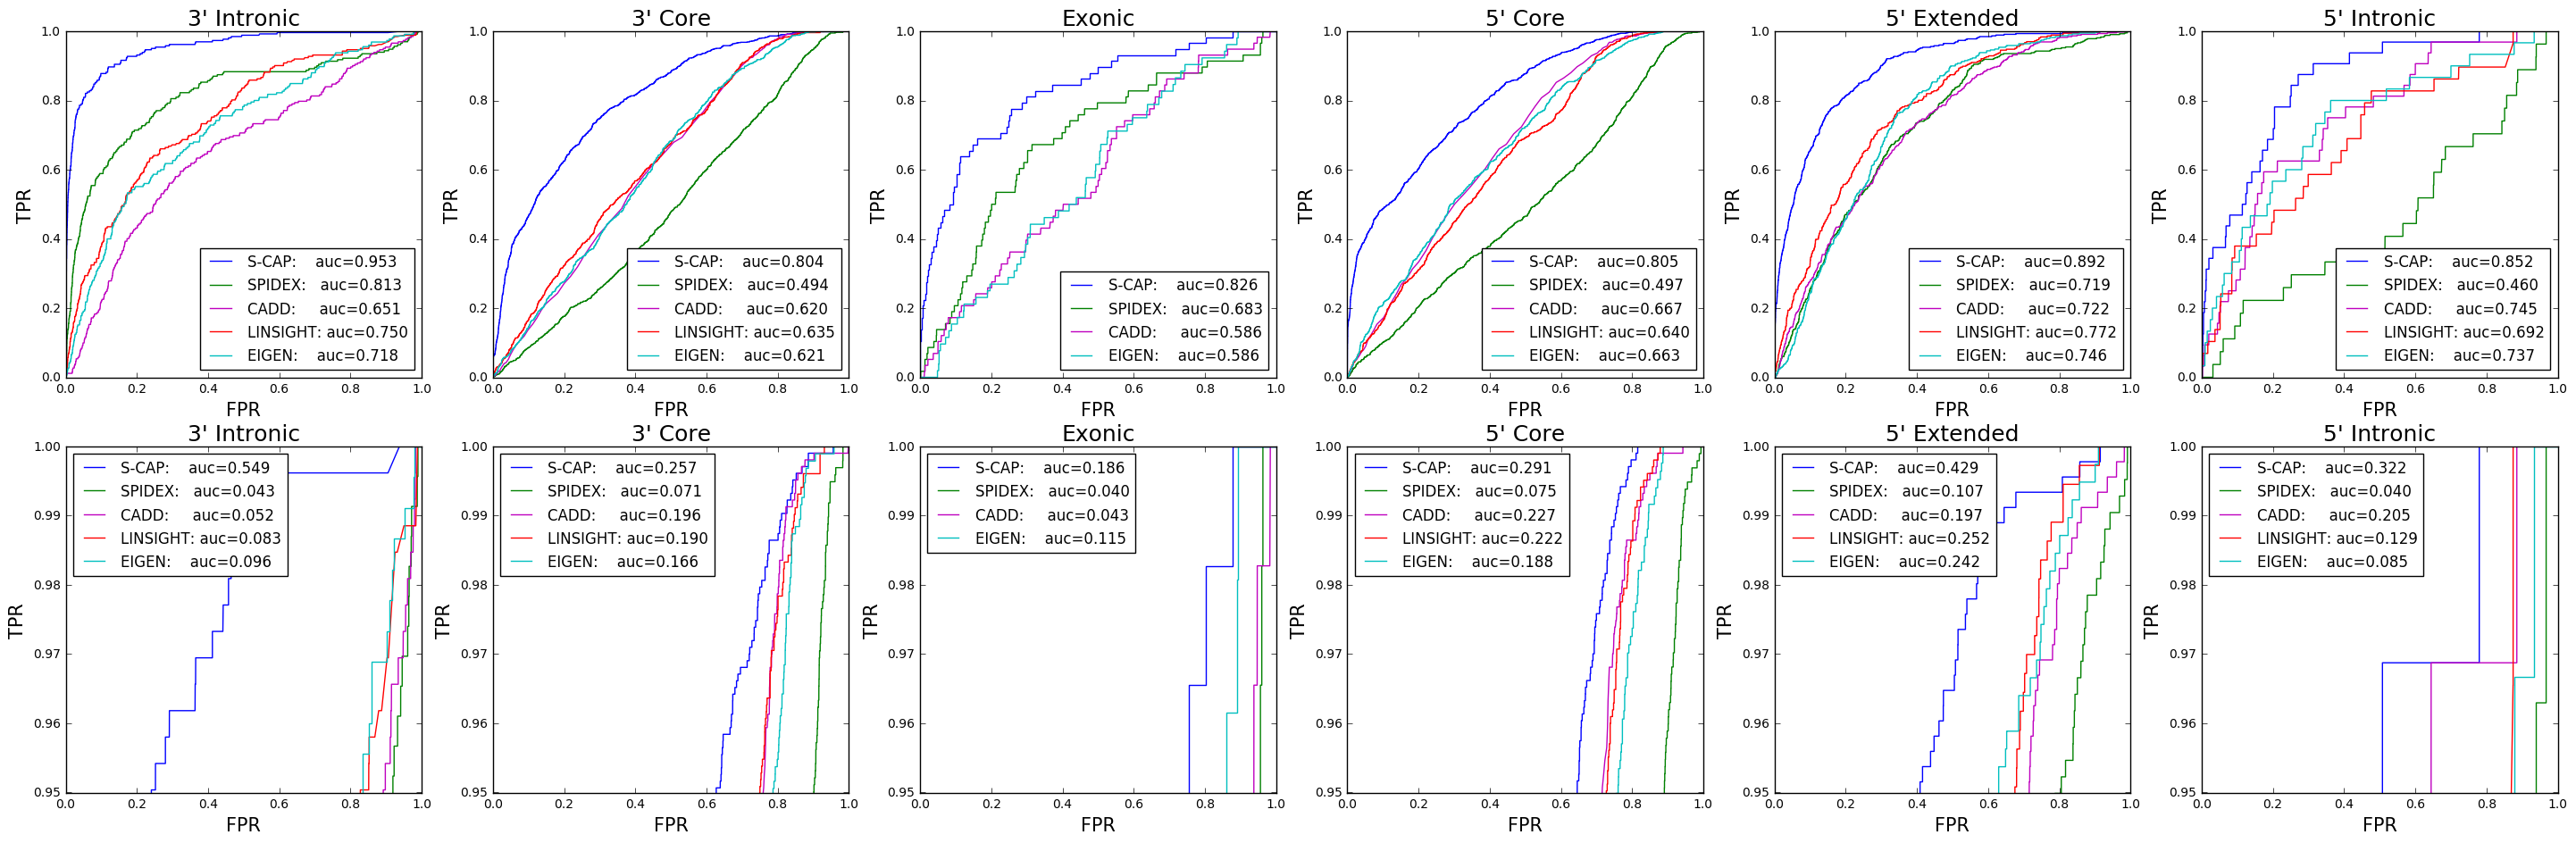

In [7]:
plot_roc(["3' Intronic", "3' Core", "Exonic", "5' Core", "5' Extended", "5' Intronic"])

# supplementary figure 4

5' Core DOM S-CAP 11590 11590
5' Core DOM SPIDEX 10104 11590
5' Core DOM CADD 11590 11590
5' Core DOM LINSIGHT 11259 11590
5' Core DOM EIGEN 10992 11590
5' Core DOM EIGEN_NONCODING 582 11590
5' Core REC S-CAP 616 616
5' Core REC SPIDEX 545 616
5' Core REC CADD 616 616
5' Core REC LINSIGHT 607 616
5' Core REC EIGEN 285 616
5' Core REC EIGEN_NONCODING 8 616
3' Core DOM S-CAP 10789 10789
3' Core DOM SPIDEX 9135 10789
3' Core DOM CADD 10789 10789
3' Core DOM LINSIGHT 10456 10789
3' Core DOM EIGEN 9824 10789
3' Core DOM EIGEN_NONCODING 952 10789
3' Core REC S-CAP 491 491
3' Core REC SPIDEX 431 491
3' Core REC CADD 491 491
3' Core REC LINSIGHT 482 491
3' Core REC EIGEN 169 491
3' Core REC EIGEN_NONCODING 9 491


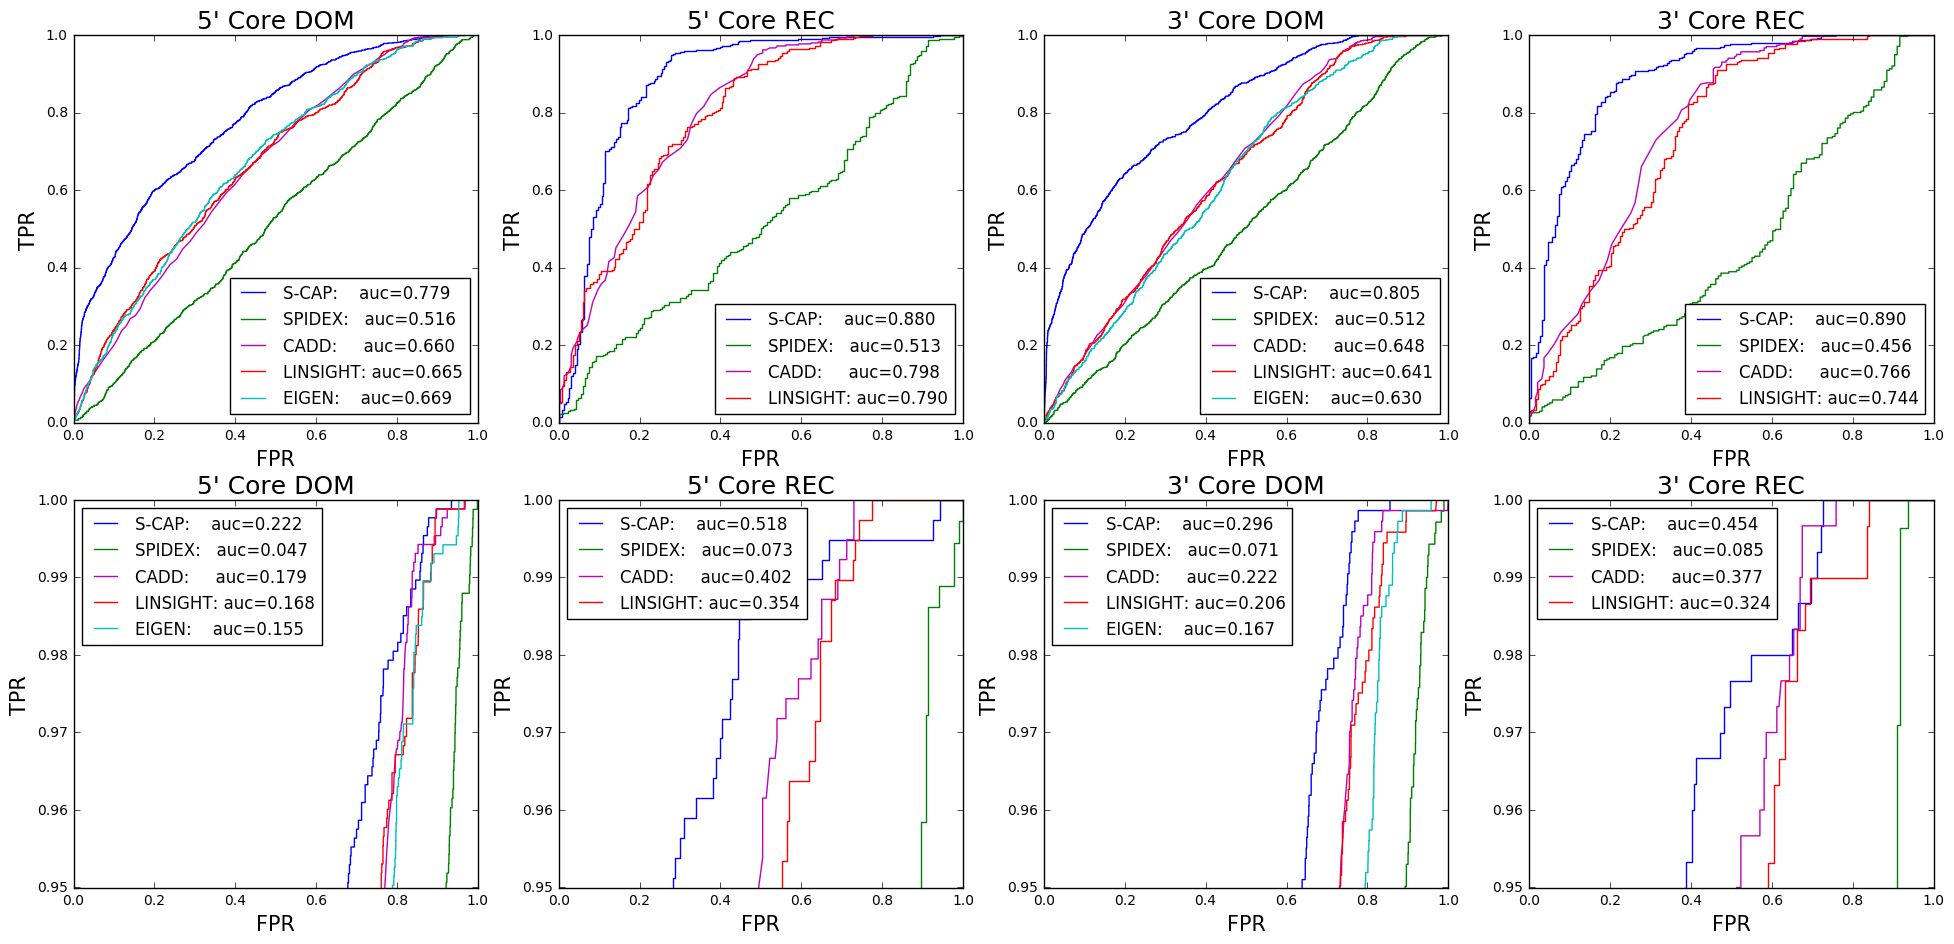

In [8]:
plot_roc(["5' Core DOM", "5' Core REC", "3' Core DOM", "3' Core REC"])

# supplementary figure 2

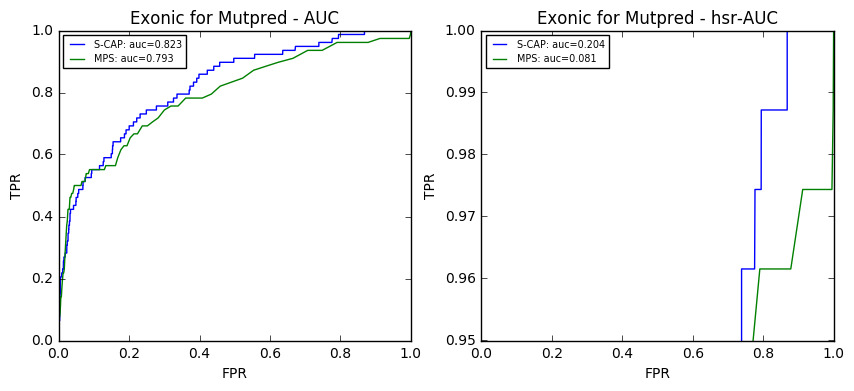

In [9]:
for region in ["Exonic for Mutpred"]:
    scap = datafiles.get(region)
    fig = plt.figure(1, figsize=(10, 4))

    ax1, ax2 = fig.add_subplot(1, 2, 1), fig.add_subplot(1, 2, 2)
    
    #for metric, idx in [("S-CAP", None), ("SPIDEX", 0), ("CADD", 1), ("LINSIGHT", 2), ("EIGEN", 3), ("EIGEN_NONCODING", 4), ("MPS", 7)]:
    for metric, idx in [("S-CAP", None), ("MPS", 4)]:

        if metric == "S-CAP":
            scores = scap.predict(scap.test_X)[:,1]
        elif metric == "MPS":
            scores = np.array(scap.comps)
        
        
        #### Throws out inf
        scap.test_Y = np.array(scap.test_Y)
        labels = scap.test_Y[[i for i in range(len(scores)) if scores[i]!=float('inf') and scores[i] != -1*float('inf')]]
        #if throws out more than 50% of data, don't use this metric to compare
        if len(labels) < len(scores)/2:
            continue
                
        scores = scores[[i for i in range(len(scores)) if scores[i]!=float('inf') and scores[i] != -1*float('inf')]]
        
        #labels = [scap.test_Y[i] for i, score in enumerate(scores) if score != np.inf and score != -1*np.inf]
        #scores = [score for score in scores if score != np.inf and score != -1*np.inf]            
        fpr, tpr, thresholds = roc_curve(labels, scores, pos_label = 1)
        a = auc(fpr, tpr)
        a95 = 20*(a - auc(fpr, map(lambda x: min([x,.95]), tpr)))
        ax1.plot(fpr, tpr, label = "{0}: auc={1:.3f}".format(metric, a))
        ax2.plot(fpr, tpr, label = "{0}: auc={1:.3f}".format(metric, a95))
    ax1.set_title(region + " - AUC")
    ax1.set_xlabel("FPR")
    ax1.set_ylabel("TPR")
    ax1.legend(loc="best", fontsize='x-small')
    
    ax2.set_ylim(.95,1)
    ax2.set_title(region + " - hsr-AUC")
    ax2.set_xlabel("FPR")
    ax2.set_ylabel("TPR")
    ax2.legend(loc="best", fontsize='x-small')
plt.show()

# figure 3 ROCs (last two are used)

In [10]:
WEIGHTS = {"Average":
               {"3' Intronic": 1, 
                "5' Intronic": 1, 
                "Exonic":      1,
                "3' Core":     1, 
                "5' Extended": 1,
                "5' Core":     1},

           "Pathogenic":
               {"3' Intronic": 1312, 
                "5' Intronic":  160, 
                "Exonic":       294,
                "3' Core":     5174, 
                "5' Extended": 2272, 
                "5' Core":     6311},

           "Patient":
               {"3' Intronic":  169, 
                "5' Intronic":  176, 
                "Exonic":       167,
                "3' Core":        2, 
                "5' Extended":   16, 
                "5' Core":        3}}

GRAPHS = ["Full", "High Sensitivity"]
X_VALS = np.linspace(0, 1, 100)

LINSIGHT Exonic continue
EIGEN Exonic continue
EIGEN 5' Intronic continue
EIGEN 5' Extended continue
EIGEN 3' Intronic continue
EIGEN_NONCODING 5' Core continue
EIGEN_NONCODING 3' Core continue
LINSIGHT Exonic continue
EIGEN Exonic continue
EIGEN 5' Intronic continue
EIGEN 5' Extended continue
EIGEN 3' Intronic continue
EIGEN_NONCODING 5' Core continue
EIGEN_NONCODING 3' Core continue
LINSIGHT Exonic continue
EIGEN Exonic continue
EIGEN 5' Intronic continue
EIGEN 5' Extended continue
EIGEN 3' Intronic continue
EIGEN_NONCODING 5' Core continue
EIGEN_NONCODING 3' Core continue


/Users/jpaggi/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


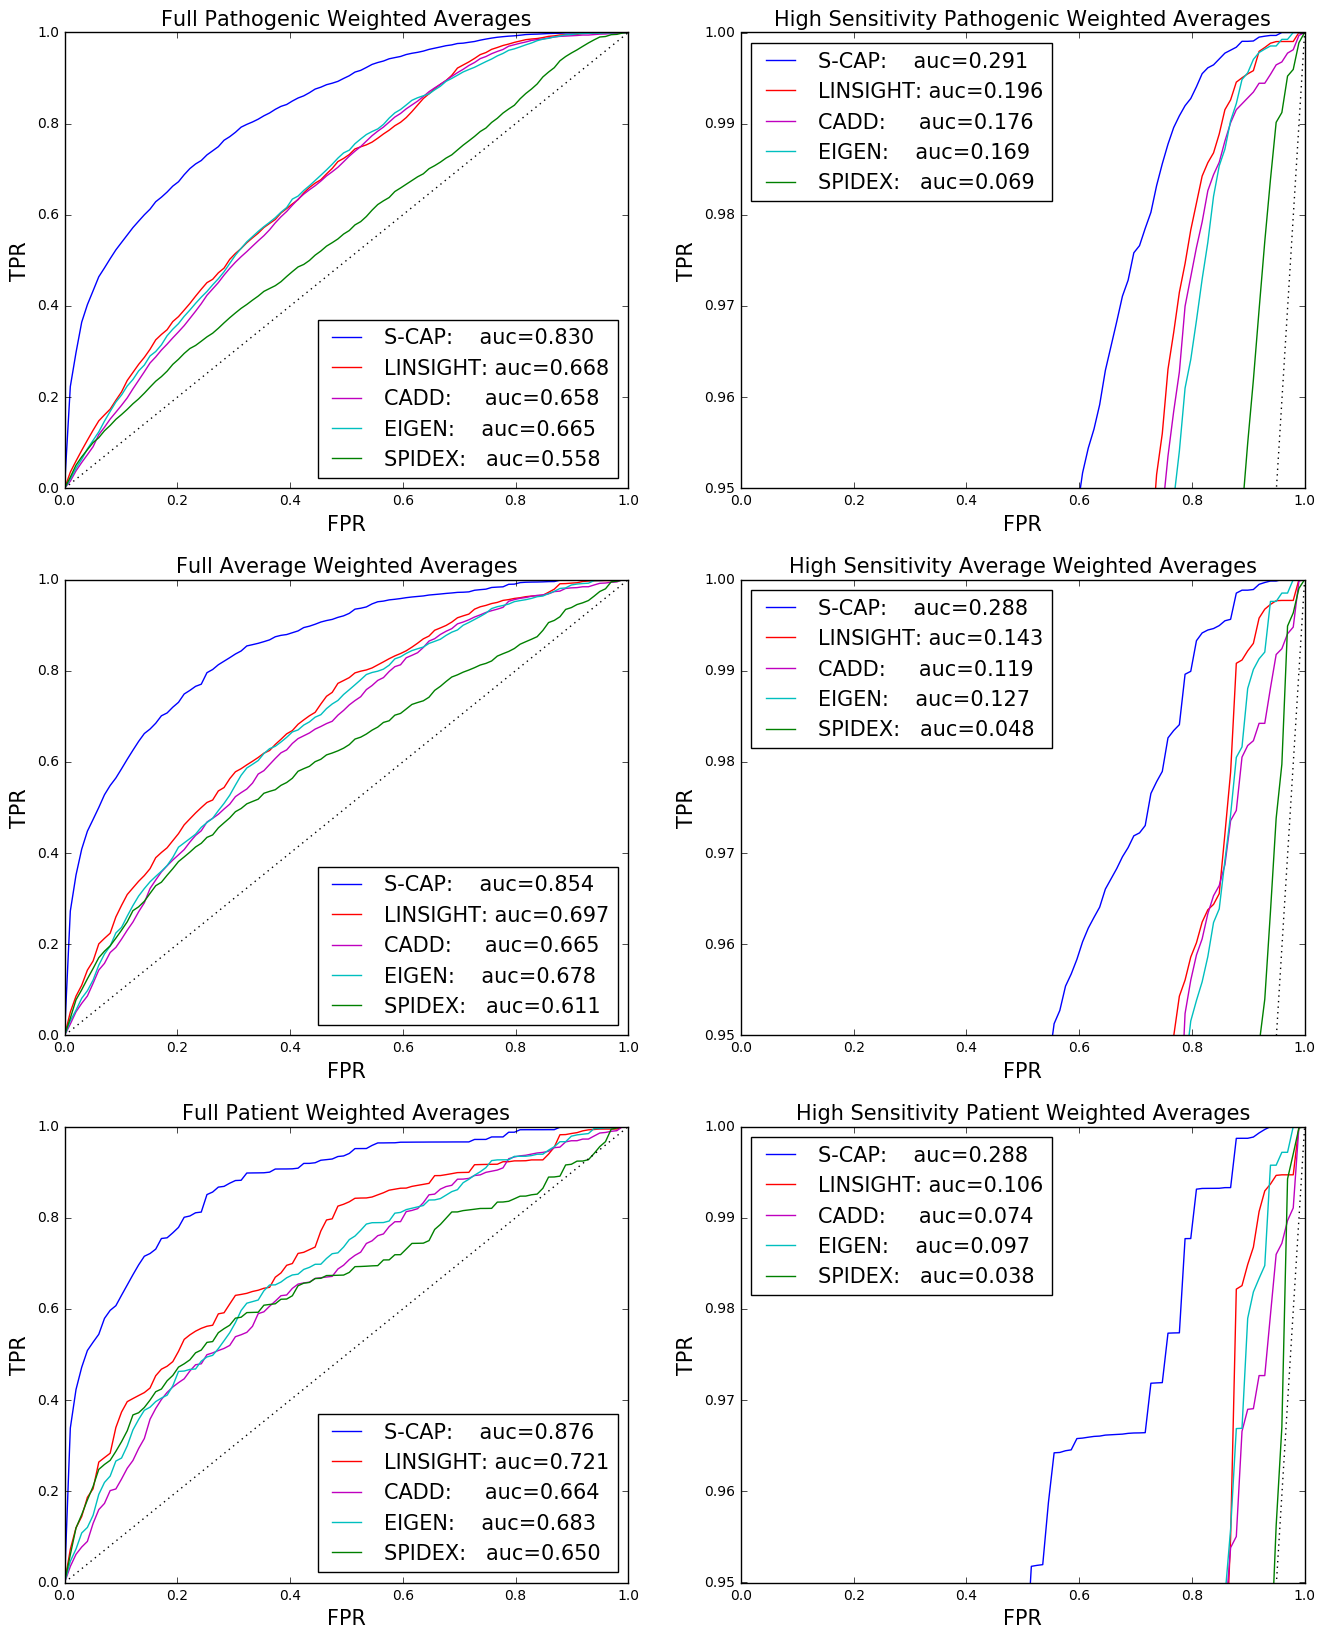

In [11]:
n_figs = 0
fig, axes = plt.subplots(len(WEIGHTS), len(GRAPHS), figsize=(16, 20))
for weights_name, weights in WEIGHTS.items():  
    mean_tpr = np.zeros((100,))
    comps_perf = {name: [np.zeros((100,)), 0.0]
                  for name in COMPS
                  if name != "EIGEN_NONCODING"}

    for region in weights.keys():
        s = datafiles.get(region)
        assert s.calc_auc() == s.auc
        preds = s.predict(s.test_X)[:,1]
        fpr, tpr, thresholds = roc_curve(s.test_Y, preds)
        mean_tpr += interp(X_VALS, fpr, tpr) * weights[region] / float(sum(weights.values()))

        ##################
            
        for i, name in enumerate(COMPS):
            scores = s.comps[:,i]
            valid = scores != float('inf')
            if sum(valid) < len(scores)/2:
                print name, region, 'continue'
                continue
            if name == 'EIGEN_NONCODING': name = 'EIGEN'
            Y = s.test_Y[valid]
            X = scores[valid]
            
            if name == 'SPIDEX':
                X = 100 - X

            fpr, tpr, thresholds = roc_curve(Y, X)
            # calculate the mean true positive rate
            comps_perf[name][0] += interp(X_VALS, fpr, tpr) * weights[region]
            comps_perf[name][1] += float(weights[region])
    
    for key in comps_perf:
        comps_perf[key][0] /= comps_perf[key][1]

    for plot_name in GRAPHS:
        ax = axes[n_figs/len(GRAPHS), n_figs % len(GRAPHS)]
        if plot_name == "Full":
            a = auc(np.linspace(0,1,100), mean_tpr)
        else:
            a = 20*(  auc(X_VALS, mean_tpr)
                    - auc(X_VALS, map(lambda x: min([x, .95]), mean_tpr)))
        ax.plot(X_VALS, mean_tpr, c = colors["S-CAP"],
                label = "{0}:{1} auc={2:.3f}".format('S-CAP', ' '*(8-len('S-CAP')), a))
        
        for key in comps_perf.keys():
            if plot_name == "Full":
                a = auc(X_VALS, comps_perf[key][0])
            else:
                a = 20*(  auc(X_VALS, comps_perf[key][0])
                        - auc(X_VALS, map(lambda x: min([x, .95]), comps_perf[key][0])))
            ax.plot(X_VALS, comps_perf[key][0], c = colors[key],
                    label = "{0}:{1} auc={2:.3f}".format(key, ' '*(8-len(key)), a))

        ax.plot(X_VALS, X_VALS, c = 'k', ls='dotted')
        ax.set_title("{} {} Weighted Averages".format(plot_name, weights_name), fontsize=15)
        ax.set_ylabel('TPR', fontsize=15)
        ax.set_xlabel('FPR', fontsize=15)
        ax.legend(loc='best', fontsize=15)
        if plot_name == "High Sensitivity":
            ax.set_ylim(0.95, 1.0)
        n_figs += 1
fig.show()